In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

dataFrameFileLocation = "ETH_hourly_data.csv"
# load all data
df = pd.read_csv(dataFrameFileLocation,
                # parse_dates=[[' Date', ' Time']],
                 low_memory=False,
                 na_values=[np.nan,'NA','?'])
df.drop(columns= ["Unnamed: 0", "index",] , inplace= True)

<ipython-input-1-4f9ff3e37b68>:9: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
# Data Analysis commands

print ( f"data Shape : {df.shape}")
print ( f"data type : \n {df.dtypes}")
print ( f"data column : \n {df.columns}")
print ( f"data describtion : \n {df.describe}")
display(df.head(5))
display(df.tail(5))


data Shape : (16778, 6)
data type : 
 date      float64
open      float64
high      float64
low       float64
close     float64
volume    float64
dtype: object
data column : 
 Index(['date', 'open', 'high', 'low', 'close', 'volume'], dtype='object')
data describtion : 
 <bound method NDFrame.describe of                date     open     high      low    close       volume
0      1.592050e+12   235.89   236.11   235.00   235.49   9425.79290
1      1.592050e+12   235.50   236.82   235.06   236.38  15799.02804
2      1.592050e+12   236.38   236.56   235.61   236.33   7264.88729
3      1.592060e+12   236.35   238.39   236.29   237.76  24624.57173
4      1.592060e+12   237.78   238.05   236.98   237.12  10134.14025
...             ...      ...      ...      ...      ...          ...
16773  1.652500e+12  2023.24  2045.41  2014.67  2036.00  18628.66590
16774  1.652510e+12  2036.00  2048.68  2027.24  2042.45  14366.44330
16775  1.652510e+12  2042.46  2048.40  2028.33  2031.94  13378.50320
16776

,date,open,high,low,close,volume
0,1.592050e+12,235.89,236.11,235.00,235.49,9425.79290
1,1.592050e+12,235.50,236.82,235.06,236.38,15799.02804
2,1.592050e+12,236.38,236.56,235.61,236.33,7264.88729
3,1.592060e+12,236.35,238.39,236.29,237.76,24624.57173
4,1.592060e+12,237.78,238.05,236.98,237.12,10134.14025


,date,open,high,low,close,volume
16773,1.652500e+12,2023.24,2045.41,2014.67,2036.00,18628.6659
16774,1.652510e+12,2036.00,2048.68,2027.24,2042.45,14366.4433
16775,1.652510e+12,2042.46,2048.40,2028.33,2031.94,13378.5032
16776,1.652520e+12,2031.94,2050.30,2027.66,2042.07,20804.8149
16777,1.652520e+12,2042.06,2053.98,2020.42,2028.75,25843.3283


In [3]:
df.describe()

,date,open,high,low,close,volume
count,1.677800e+04,16778.000000,16778.000000,16778.000000,16778.000000,16778.000000
mean,1.622291e+12,2119.478009,2134.271224,2103.466555,2119.582944,33901.192745
std,1.746250e+10,1332.625161,1340.570123,1324.080673,1332.547198,32151.450280
min,1.592050e+12,217.810000,220.140000,216.000000,217.840000,0.000000
25%,1.607160e+12,585.515000,588.637500,582.232500,585.612500,14854.433380
50%,1.622300e+12,2282.605000,2303.845000,2255.315000,2282.610000,24495.213250
75%,1.637420e+12,3157.267500,3176.197500,3137.350000,3157.257500,41062.288392
max,1.652520e+12,4846.940000,4868.000000,4833.190000,4846.710000,493227.882800


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16778 entries, 0 to 16777
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    16778 non-null  float64
 1   open    16778 non-null  float64
 2   high    16778 non-null  float64
 3   low     16778 non-null  float64
 4   close   16778 non-null  float64
 5   volume  16778 non-null  float64
dtypes: float64(6)
memory usage: 786.6 KB


Text(0.5, 1.0, 'Closing Price')

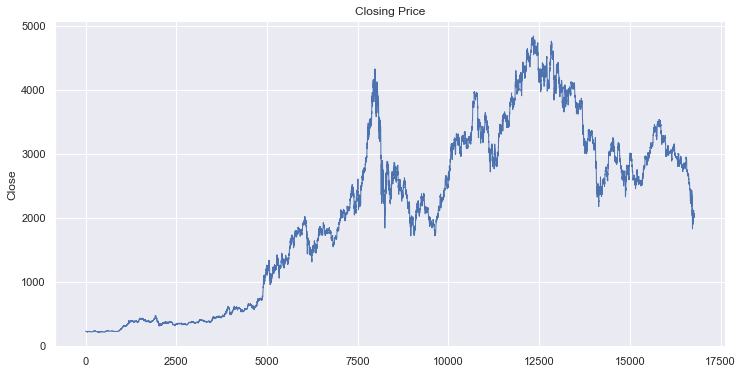

In [5]:
import matplotlib.pyplot as plt
# Display figures inline in Jupyter notebook
import seaborn as sns
# Use seaborn style defaults
sns.set(rc={'figure.figsize':(12, 6)})
df['close'].plot(linewidth=1);
plt.ylabel('Close')
plt.xlabel(None)
plt.title("Closing Price")

Text(0.5, 1.0, 'Stock Cumulative Returns')

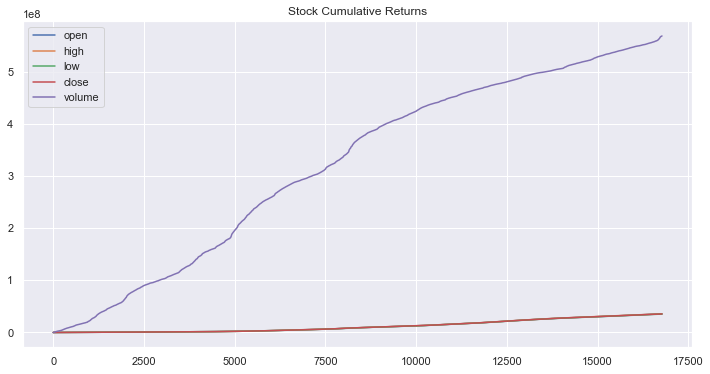

In [6]:
# Comulative Return
dd = pd.read_csv(dataFrameFileLocation,
                 low_memory=False,
                 na_values=[np.nan,'NA','?'])
dd.drop(columns= ["Unnamed: 0", "index","date"] , inplace= True)
dr = dd.cumsum()
dr.plot()
plt.title('Stock Cumulative Returns')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Stock Autocorrelation plot')

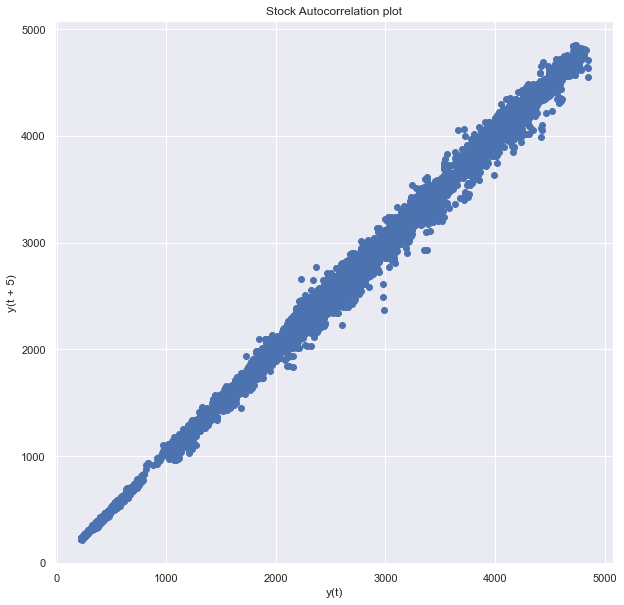

In [7]:
plt.figure(figsize=(10,10))
lag_plot(df['open'], lag=5)
plt.title('Stock Autocorrelation plot')

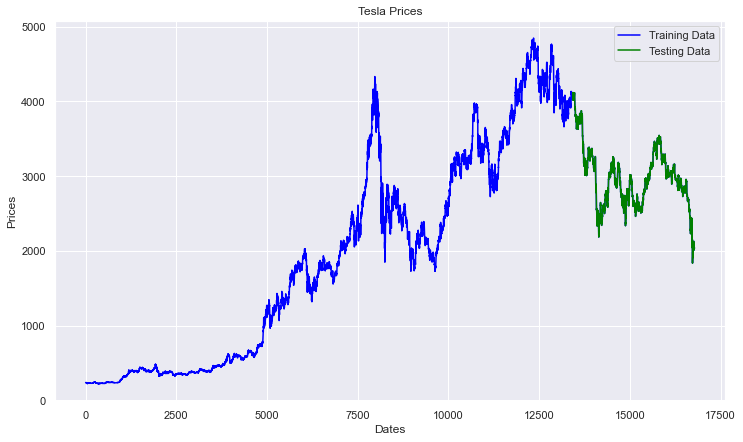

In [8]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(12,7))
plt.title('Tesla Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['open'], 'blue', label='Training Data')
plt.plot(test_data['open'], 'green', label='Testing Data')
plt.legend()

In [9]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from collections import deque
import random
        
class Agent:

    LEARNING_RATE = 0.003
    BATCH_SIZE = 32
    LAYER_SIZE = 256
    OUTPUT_SIZE = 3
    EPSILON = 0.5
    DECAY_RATE = 0.005
    MIN_EPSILON = 0.1
    GAMMA = 0.99
    MEMORIES = deque()
    MEMORY_SIZE = 300
    
    def __init__(self, state_size, window_size, trend, skip):
        self.state_size = state_size
        self.window_size = window_size
        self.half_window = window_size // 2
        self.trend = trend
        self.skip = skip
        tf.compat.v1.reset_default_graph()
        self.INITIAL_FEATURES = np.zeros((4, self.state_size))
        self.X = tf.placeholder(tf.float32, (None, None, self.state_size))
        self.Y = tf.placeholder(tf.float32, (None, self.OUTPUT_SIZE))
        cell = tf.nn.rnn_cell.LSTMCell(self.LAYER_SIZE, state_is_tuple = False)
        self.hidden_layer = tf.placeholder(tf.float32, (None, 2 * self.LAYER_SIZE))
        self.rnn,self.last_state = tf.nn.dynamic_rnn(inputs=self.X,cell=cell,
                                                    dtype=tf.float32,
                                                    initial_state=self.hidden_layer)
        tensor_action, tensor_validation = tf.split(self.rnn[:,-1],2,1)
        feed_action = tf.layers.dense(tensor_action, self.OUTPUT_SIZE)
        feed_validation = tf.layers.dense(tensor_validation, 1)
        self.logits = feed_validation + tf.subtract(feed_action,tf.reduce_mean(feed_action,axis=1,keep_dims=True))
        self.cost = tf.reduce_sum(tf.square(self.Y - self.logits))
        self.optimizer = tf.train.AdamOptimizer(learning_rate = self.LEARNING_RATE).minimize(self.cost)
        self.sess = tf.InteractiveSession()
        self.sess.run(tf.global_variables_initializer())
    
    def _memorize(self, state, action, reward, new_state, dead, rnn_state):
        self.MEMORIES.append((state, action, reward, new_state, dead, rnn_state))
        if len(self.MEMORIES) > self.MEMORY_SIZE:
            self.MEMORIES.popleft()

    def _construct_memories(self, replay):
        states = np.array([a[0] for a in replay])
        new_states = np.array([a[3] for a in replay])
        init_values = np.array([a[-1] for a in replay])
        Q = self.sess.run(self.logits, feed_dict={self.X:states, self.hidden_layer:init_values})
        Q_new = self.sess.run(self.logits, feed_dict={self.X:new_states, self.hidden_layer:init_values})
        replay_size = len(replay)
        X = np.empty((replay_size, 4, self.state_size))
        Y = np.empty((replay_size, self.OUTPUT_SIZE))
        INIT_VAL = np.empty((replay_size, 2 * self.LAYER_SIZE))
        for i in range(replay_size):
            state_r, action_r, reward_r, new_state_r, dead_r, rnn_memory = replay[i]
            target = Q[i]
            target[action_r] = reward_r
            if not dead_r:
                target[action_r] += self.GAMMA * np.amax(Q_new[i])
            X[i] = state_r
            Y[i] = target
            INIT_VAL[i] = rnn_memory
        return X, Y, INIT_VAL
    
    def get_state(self, t):
        window_size = self.window_size + 1
        d = t - window_size + 1
        block = self.trend[d : t + 1] if d >= 0 else -d * [self.trend[0]] + self.trend[0 : t + 1]
        res = []
        for i in range(window_size - 1):
            res.append(block[i + 1] - block[i])
        return np.array(res)
    
    def buy(self, initial_money):
        starting_money = initial_money
        states_sell = []
        states_buy = []
        inventory = []
        state = self.get_state(0)
        init_value = np.zeros((1, 2 * self.LAYER_SIZE))
        for k in range(self.INITIAL_FEATURES.shape[0]):
            self.INITIAL_FEATURES[k,:] = state
        for t in range(0, len(self.trend) - 1, self.skip):
            action, last_state = self.sess.run([self.logits,self.last_state],
                                                feed_dict={self.X:[self.INITIAL_FEATURES],
                                                            self.hidden_layer:init_value})
            action, init_value = np.argmax(action[0]), last_state
            next_state = self.get_state(t + 1)
            
            if action == 1 and initial_money >= self.trend[t]:
                inventory.append(self.trend[t])
                initial_money -= self.trend[t]
                states_buy.append(t)
                print('day %d: buy 1 unit at price %f, total balance %f'% (t, self.trend[t], initial_money))
            
            elif action == 2 and len(inventory):
                bought_price = inventory.pop(0)
                initial_money += self.trend[t]
                states_sell.append(t)
                try:
                    invest = ((close[t] - bought_price) / bought_price) * 100
                except:
                    invest = 0
                print(
                    'day %d, sell 1 unit at price %f, investment %f %%, total balance %f,'
                    % (t, close[t], invest, initial_money)
                )
            
            new_state = np.append([self.get_state(t + 1)], self.INITIAL_FEATURES[:3, :], axis = 0)
            self.INITIAL_FEATURES = new_state
        invest = ((initial_money - starting_money) / starting_money) * 100
        total_gains = initial_money - starting_money
        return states_buy, states_sell, total_gains, invest
            
    
    def train(self, iterations, checkpoint, initial_money):
        for i in range(iterations):
            total_profit = 0
            inventory = []
            state = self.get_state(0)
            starting_money = initial_money
            init_value = np.zeros((1, 2 * self.LAYER_SIZE))
            for k in range(self.INITIAL_FEATURES.shape[0]):
                self.INITIAL_FEATURES[k,:] = state
            for t in range(0, len(self.trend) - 1, self.skip):
                
                if np.random.rand() < self.EPSILON:
                    action = np.random.randint(self.OUTPUT_SIZE)
                else:
                    action, last_state = self.sess.run([self.logits,
                                                  self.last_state],
                                                  feed_dict={self.X:[self.INITIAL_FEATURES],
                                                             self.hidden_layer:init_value})
                    action, init_value = np.argmax(action[0]), last_state
                    
                next_state = self.get_state(t + 1)
                
                if action == 1 and starting_money >= self.trend[t]:
                    inventory.append(self.trend[t])
                    starting_money -= self.trend[t]
                
                elif action == 2 and len(inventory) > 0:
                    bought_price = inventory.pop(0)
                    total_profit += self.trend[t] - bought_price
                    starting_money += self.trend[t]
                    
                invest = ((starting_money - initial_money) / initial_money)
                new_state = np.append([self.get_state(t + 1)], self.INITIAL_FEATURES[:3, :], axis = 0)
                self._memorize(self.INITIAL_FEATURES, action, invest, new_state, 
                               starting_money < initial_money, init_value[0])
                self.INITIAL_FEATURES = new_state
                batch_size = min(len(self.MEMORIES), self.BATCH_SIZE)
                replay = random.sample(self.MEMORIES, batch_size)
                X, Y, INIT_VAL = self._construct_memories(replay)
                
                cost, _ = self.sess.run([self.cost, self.optimizer], 
                                        feed_dict={self.X: X, self.Y:Y,
                                                  self.hidden_layer: INIT_VAL})
                self.EPSILON = self.MIN_EPSILON + (1.0 - self.MIN_EPSILON) * np.exp(-self.DECAY_RATE * i)
                
            if (i+1) % checkpoint == 0:
                print('epoch: %d, total rewards: %f.3, cost: %f, total money: %f'%(i + 1, total_profit, cost,
                                                                                  starting_money))

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
close = df.close.values.tolist()
initial_money = 10000
window_size = 30
skip = 1
batch_size = 32
agent = Agent(state_size = window_size, 
              window_size = window_size, 
              trend = close, 
              skip = skip)
agent.train(iterations = 200, checkpoint = 10, initial_money = initial_money)

In [ ]:
states_buy, states_sell, total_gains, invest = agent.buy(initial_money = initial_money)

In [ ]:
fig = plt.figure(figsize = (15,5))
plt.plot(close, color='r', lw=2.)
plt.plot(close, '^', markersize=10, color='m', label = 'buying signal', markevery = states_buy)
plt.plot(close, 'v', markersize=10, color='k', label = 'selling signal', markevery = states_sell)
plt.title('total gains %f, total investment %f%%'%(total_gains, invest))
plt.legend()
plt.show()